<a href="https://colab.research.google.com/github/simodepth96/Data-Science-Portfolio/blob/main/UK_vs_Itay_Cities_Population_EDA_(Census_2021).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is raw attempt of exploratory data analysis that considers the demographic Census 2021 of British and Italian Cities.


* Importing Italian Cities dataset
* Importing UK Cities dataset
* Data Wrangling
* British Cities - Univariate Analysis
* Study of Central Tendency Measures
* Definition of Clusters based on the spread of Population


Dataset sources:

* **Italy** - https://en.wikipedia.org/wiki/List_of_cities_in_Italy
* **United Kingdom** - https://en.wikipedia.org/wiki/List_of_cities_in_the_United_Kingdom

> Made by [![Follow](https://img.shields.io/twitter/follow/SimoneDePalma2?style=social)](https://twitter.com/SimoneDePalma2)

> Follow [![LinkedIn](https://img.shields.io/badge/LinkedIn-Follow-blue?style=social&logo=linkedin)](https://www.linkedin.com/in/simodepth96/)

In [3]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
!pip install plotly
import plotly.express as px
from IPython.display import display_html, display_markdown, HTML
from IPython.core.display import display

def md(text):
    return display_markdown(text, raw=True)

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

# Import Data

In [40]:
import pandas as pd

# Load the dataset (assuming it's already loaded into a DataFrame called 'uk')
url1 = 'https://en.wikipedia.org/wiki/List_of_cities_in_the_United_Kingdom'
html = pd.read_html(url1)
uk = html[0]

In [41]:
#@title Data Cleaning
uk.columns = uk.iloc[0]
uk = uk[1:]

# Drop the first two columns
uk = uk.drop(uk.columns[[0, 1]], axis=1)

# Reset the index
uk.reset_index(drop=True, inplace=True)

# Set the custom headers
custom_headers = ["Area", "year granted or confirmed", "city", "City council status", "Population"]
uk.columns = custom_headers
uk.drop(columns=["city", "City council status"], inplace=True)

# Split the 'City' column by comma
city_split = uk['Area'].str.split(',', expand=True)
city_split.columns = ['Area', 'Country']

# Split the 'Population' column by tab space
population_split = uk['Population'].str.split('\t', expand=True)
uk[['Population', 'Additional Info']] = uk['Population'].str.extract(r'([\d,]+)(.*)', expand=True)

# Concatenate the split columns back into the original DataFrame
uk = pd.concat([city_split, uk[['year granted or confirmed', 'Population', 'Additional Info']]], axis=1)
uk.drop(columns=['Additional Info'], inplace=True)

# Visualize the columns of the dataset
print(uk.columns)
uk.head()

Index(['Area', 'Country', 'year granted or confirmed', 'Population'], dtype='object')


,Area,Country,year granted or confirmed,Population
0,London,England,1540,"213,119"
1,West Midlands,England,188933,"1,171,467"
2,Yorkshire and the Humber,England,1893,"829,417"
3,Scotland,None,18th century[5] (Burgh: 1492),"620,700"
4,North West,England,185334,"585,057"


# Data EDA

In [42]:
uk.info()
print(len(uk))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Area                       75 non-null     object
 1   Country                    54 non-null     object
 2   year granted or confirmed  75 non-null     object
 3   Population                 75 non-null     object
dtypes: object(4)
memory usage: 2.5+ KB
75


In [43]:
uk = uk.dropna()
print(len(uk))

54


In [44]:
import pandas as pd

# Function to safely convert to integer
def safe_convert_to_int(value):
    try:
        # Remove commas and convert to integer
        return int(value.replace(',', ''))
    except ValueError:
        return None  # or handle the error as per your requirement

# Convert 'Population' column to integer safely
uk['Population'] = uk['Population'].apply(safe_convert_to_int)

print(len(uk))
uk.tail()


54


,Area,Country,year granted or confirmed,Population
65,South East,England,1075 (time immemorial),29407
67,South West,England,1877,21046
68,East,England,1109[65] (time immemorial),20574
69,Yorkshire and the Humber,England,1865,16590
72,South West,England,time immemorial,11145


In [45]:
grouped_df = uk.groupby('Area')['Population'].sum().sort_values(ascending=False).reset_index()
grouped_df

,Area,Population
0,Yorkshire and the Humber,3136496
1,West Midlands,2263272
2,North West,1922353
3,South East,1529322
4,East,1242585
5,South West,1190949
6,East Midlands,1078386
7,North East,721152
8,London,213119


In [ ]:
#@title Data Visualization: Population of Cities in the United Kingdom (2021)

fig = px.bar(grouped_df, x='Area', y='Population',
             labels={'Area': 'City/Area', 'Population': 'Population'},
             title='Population of Cities in the United Kingdom (2021)',
             color='Population',  # Color bars by population
             color_continuous_scale='Viridis')  # Set color scale

# Customize the layout
fig.update_layout(xaxis_title='City/Area',
                  yaxis_title='Population',
                  xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
                  showlegend=False)    # Hide legend for better clarity

# Show the plot
fig.show()

# Central Tendency for Quantitative Data
For quantitative variables, we often want to describe the central tendency, or the “typical” value of a variable.

* **Mean**: The average value of the variable, calculated as the sum of all values divided by the number of values.

* **Median**: The middle value of the variable when sorted.

* **Mode**: The most frequent value of the variable.

* **Trimmed mean**: The mean excluding x percent of the lowest and highest data points.

In [46]:
# Mean
uk['Population'].mean().round(2)

# Median
#uk['Population 2021'].median()

# Mode
#uk['Population 2021'].mode()

# Trimmed mean
#from scipy.stats import trim_mean
#trim_mean(uk['Population 2021'], proportiontocut=0.1)  # trim extreme 10%

246252.48

# Test Normal distribution of the Population

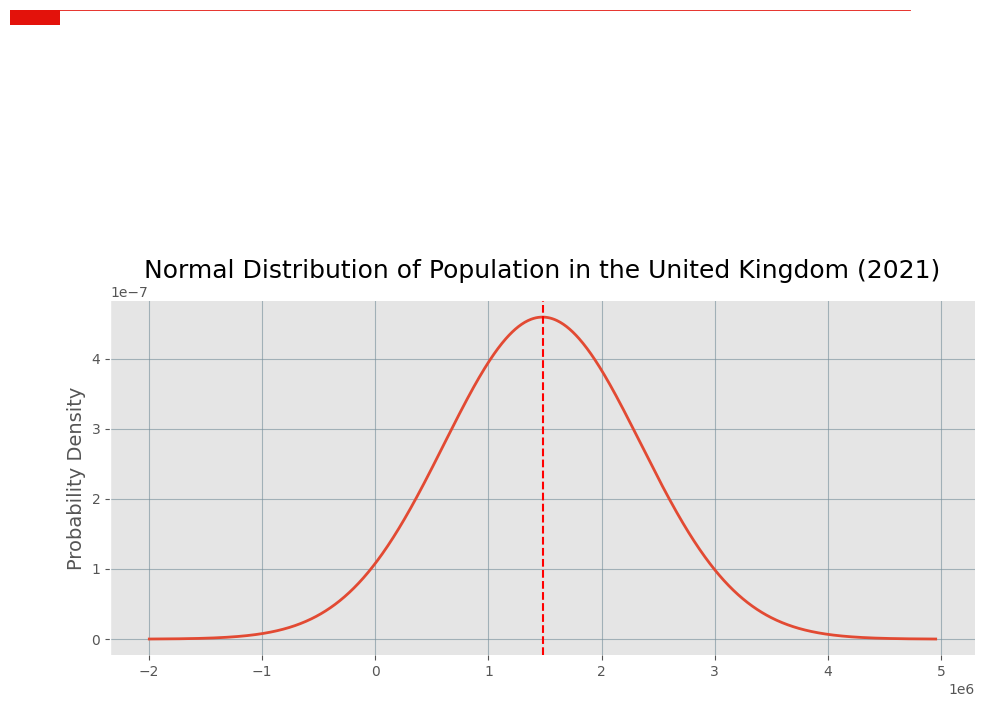

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate mean and standard deviation of the population data
mu = grouped_df['Population'].mean()
sigma = grouped_df['Population'].std()

# Generate a normal distribution
dist = stats.norm(mu, sigma)

# Generate x values for plotting
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Calculate y values for plotting
y = dist.pdf(x)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, linewidth=2)

ax.set_title('Normal Distribution of Population in the United Kingdom (2021)', fontsize=18)
ax.set_ylabel('Probability Density', fontsize=14)
ax.grid(which="major", axis='both', color='#758D99', alpha=0.6, zorder=1)
ax.axvline(x=mu, linestyle='--', color='r')
ax.spines[['top','right','bottom']].set_visible(False)
ax.annotate(f'Mean={mu:.2f}\nStandard Deviation={sigma:.2f}', xy=(mu, 0.01), xytext=(mu - 1.5*sigma, 0.02),
            arrowprops=dict(facecolor='red', shrink=0.05),
            fontsize=14, color='r')

ax.plot([0.02, 0.92],                   # Set width of line
        [1.17, 1.17],                   # Set height of line
        transform=fig.transFigure,      # Set location relative to plot
        clip_on=False,
        color='#E3120B',
        linewidth=.6)
ax.add_patch(plt.Rectangle((0.02, 1.17),           # Set location of rectangle by lower left corner
                           0.05,                  # Width of rectangle
                           -0.025,                # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B',
                           transform=fig.transFigure,
                           clip_on=False,
                           linewidth=0))
plt.tight_layout()

plt.show()


# Kurtosis and Skewness

In [48]:
print(f"Skewness: {grouped_df['Population'].skew().round(2)}")
print(f"Kurtosis: {grouped_df['Population'].kurt().round(2)}")

Skewness: 0.63
Kurtosis: 0.56


In [57]:
grouped_df['Population'].mean()

1477514.888888889

In [58]:
grouped_df['Population'].median()

1242585.0

Here the **mean is > median** because extreme values affect the mean more than the median. Hence, we might expect the distribution to be skewed to the right

##Kurtosis
The curve tends to be slightly **leptokurtic** but that's not really the case

##Skewness
As the coeficient for skewness approaches to 1, the shape of the bell tends to be **skewed** to the right (>1), but again this is not the case.


---

As confirmed by the asymmetry measures, we can confirm this is close to a normal distribution

# Spread of Population in UK cities

In [49]:
# Create a boxplot of Clicks and Impressions columns using Plotly Express
fig = px.violin(grouped_df,
             y=['Population'],
             orientation='v',
             template='plotly_dark',
             width=1024,
             height=600)

# Add labels and title
fig.update_layout(xaxis_title='Violin plot of Population 2021')

# Display the plot
fig.show()


# IQR calculation to trim away Outliers

The Interquartile Range (IQR) is a measure of statistical dispersion, or how spread out the values in a data set are. It is calculated as the difference between the 75th (Q3) and 25th (Q1) percentiles.

Once you have calculated the IQR, you can use it to segment the distribution of your data in several ways, such as **identifying outliers** or **segmenting the data into different quartiles**.

For highly skewed data or data with extreme outliers (this case), we might prefer to use **IQR** over traditional central tendency measures such as variance and standard deviation

In [50]:
#@title Calculate IQR
Q1 = uk['Population'].quantile(0.25)
Q3 = uk['Population'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

In [51]:
#@title Use IQR to Identify Outliers
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Segment the data into outliers and non-outliers
outliers_below = uk[uk['Population'] < lower_bound]
outliers_above = uk[uk['Population'] > upper_bound]
outliers = pd.concat([outliers_below, outliers_above])
non_outliers = uk[(uk['Population'] >= lower_bound) & (uk['Population'] <= upper_bound)]

# Print outliers and non-outliers
print("Outliers:")
print(outliers)
print("\nNon-outliers:")
print(non_outliers)

Outliers:
                       Area   Country year granted or confirmed  Population
1             West Midlands   England                    188933     1171467
2  Yorkshire and the Humber   England                      1893      829417
4                North West   England                    185334      585057
5  Yorkshire and the Humber   England                      1893      579082
6  Yorkshire and the Humber   England                      1897      556880

Non-outliers:
                        Area   Country   year granted or confirmed  Population
0                     London   England                        1540      213119
8                 North West   England                        1880      504932
9                 South West   England                        1542      482815
11             East Midlands   England                      191922      379963
12             West Midlands   England      1102 (time immemorial)      368483
13  Yorkshire and the Humber   England       

Outliers refer to extreme values from a distribution.
Above, we can observe how such extreme values referred to the largest geographical areas in the dataset.

In [59]:
#@title Segment Data into Quartiles
Q2 = uk['Population'].median()

# Segment the data into quartiles
Q1_segment = uk[uk['Population'] <= Q1]
Q2_segment = uk[(uk['Population'] > Q1) & (uk['Population'] <= Q2)]
Q3_segment = uk[(uk['Population'] > Q2) & (uk['Population'] <= Q3)]
Q4_segment = uk[uk['Population'] > Q3]

# Print quartile segments
print("Small (<= Q1):")
print(Q1_segment)
print("\nAverage (Q1 < Population <= Q2):")
print(Q2_segment)
print("\nMedium (Q2 < Population <= Q3):")
print(Q3_segment)
print("\nLarge (> Q3):")
print(Q4_segment)


Small (<= Q1):
                        Area   Country   year granted or confirmed  Population
49                South East   England             time immemorial      132341
50                North East   England             time immemorial      126486
51                North West   England      1133 (time immemorial)      110024
52             West Midlands   England             time immemorial      104589
53             East Midlands   England      1072 (time immemorial)      102392
54                South West   England      1090 (time immemorial)       95043
59             West Midlands   England             time immemorial       53113
63                South West   England                        1227       41552
64             West Midlands   England             time immemorial       32580
65                South East   England      1075 (time immemorial)       29407
67                South West   England                        1877       21046
68                      East   Englan

# Data Segmentation based on Distribution Spread
Based on the Population distribution, we can divide the dataset into 3 tiers:

* Large
* Medium
* Small

In [71]:
import pandas as pd

# Assuming ita is your DataFrame and it contains a column named 'Population'

# Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR
Q1 = uk['Population'].quantile(0.25)
Q3 = uk['Population'].quantile(0.75)
Q2 = uk['Population'].median()

# Segment the data into quartiles
Q1_segment = uk[uk['Population'] <= Q1].copy()
Q1_segment['Size'] = 'Small'

Q2_segment = uk[(uk['Population'] > Q1) & (uk['Population'] <= Q2)].copy()
Q2_segment['Size'] = 'Average'

Q3_segment = uk[(uk['Population'] > Q2) & (uk['Population'] <= Q3)].copy()
Q3_segment['Size'] = 'Medium'

Q4_segment = uk[uk['Population'] > Q3].copy()
Q4_segment['Size'] = 'Large'

# Concatenate the segments
uk_segments = pd.concat([Q1_segment, Q2_segment, Q3_segment, Q4_segment])
uk_segments.sort_values('Population', ascending=False, inplace=True)
uk_segments.to_excel('uk.xlsx',index=False)
uk_segments

,Area,Country,year granted or confirmed,Population,Size
1,West Midlands,England,188933,1171467,Large
2,Yorkshire and the Humber,England,1893,829417,Large
4,North West,England,185334,585057,Large
5,Yorkshire and the Humber,England,1893,579082,Large
6,Yorkshire and the Humber,England,1897,556880,Large
8,North West,England,1880,504932,Large
9,South West,England,1542,482815,Large
11,East Midlands,England,191922,379963,Large
12,West Midlands,England,1102 (time immemorial),368483,Large
13,Yorkshire and the Humber,England,1888,362355,Large


In [62]:
import plotly.express as px

# Create a pivot table
pivot_uk = uk_segments.pivot_table(index='Size', columns='Area', values="Population", fill_value=0)

# Sort the columns based on total population
sorted_columns = pivot_uk.sum().sort_values(ascending=False).index
pivot_uk = pivot_uk[sorted_columns]

# Create a heatmap with color scale
heatmap = px.imshow(pivot_uk, text_auto=True)
heatmap.update_layout(
    title='Population by City in the United Kingdom (2021)',
    template='plotly_dark',
    xaxis_title='',
    yaxis_title='Population',
    width=1200,
    height=700,
    xaxis_tickangle=-45,  # Rotate x-axis tick labels by -45 degrees
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)
heatmap.show()

# Italian Cities

In [1]:
import pandas as pd

# Load the dataset (assuming it's already loaded into a DataFrame called 'uk')
url2 = 'https://en.wikipedia.org/wiki/List_of_cities_in_Italy'
html = pd.read_html(url2)
ita = html[0]

In [2]:
#@title Data Cleaning
ita.drop(columns=['Rank', '2021 estimate', 'Change'], inplace=True)

ita.rename(columns={'City': 'City',
                    '2011 census':'Population',
                    'Region':'Region'}, inplace=True)

# data wrangling: convert numbers into integers
ita['Population'] = ita['Population'].astype(int)

ita.reindex(columns=['City', 'Region', 'Population'])
ita.head()

,City,Population,Region
0,Rome,2617175,Lazio
1,Milan,1242123,Lombardy
2,Naples,962003,Campania
3,Turin,872367,Piedmont
4,Palermo,657651,Sicily


In [4]:
ita.info()
print(len(ita))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        140 non-null    object
 1   Population  140 non-null    int64 
 2   Region      140 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.4+ KB
140


In [5]:
grouped_ita = ita.groupby('City')['Population'].sum().sort_values(ascending=False).reset_index()
grouped_ita

,City,Population
0,Rome,2617175
1,Milan,1242123
2,Naples,962003
3,Turin,872367
4,Palermo,657651
...,...,...
135,Montesilvano,50413
136,Rovigo,50164
137,Rho,50052
138,Mazara del Vallo,49995


In [6]:
#@title Data Visualization: Population of Cities in Italy (2021)

fig = px.bar(grouped_ita.head(25), x='City', y='Population',
             labels={'City': 'City/Area', 'Population': 'Population'},
             title='Population of Cities in Italy (2021)',
             color='Population',  # Color bars by population
             color_continuous_scale='Viridis')  # Set color scale

# Customize the layout
fig.update_layout(xaxis_title='City',
                  yaxis_title='Population',
                  xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
                  showlegend=False)    # Hide legend for better clarity

# Show the plot
fig.show()

# Central Tendency for Quantitative Data
For quantitative variables, we often want to describe the central tendency, or the “typical” value of a variable.

* **Mean**: The average value of the variable, calculated as the sum of all values divided by the number of values.

* **Median**: The middle value of the variable when sorted.

* **Mode**: The most frequent value of the variable.

* **Trimmed mean**: The mean excluding x percent of the lowest and highest data points.

In [7]:
# Mean
ita['Population'].mean().round(2)

# Median
#ita['Population 2021'].median()

# Mode
#ita['Population 2021'].mode()

# Trimmed mean
#from scipy.stats import trim_mean
#trim_mean(ita['Population'], proportiontocut=0.1)  # trim extreme 10%

142546.09

# Test Normal distribution of the Population

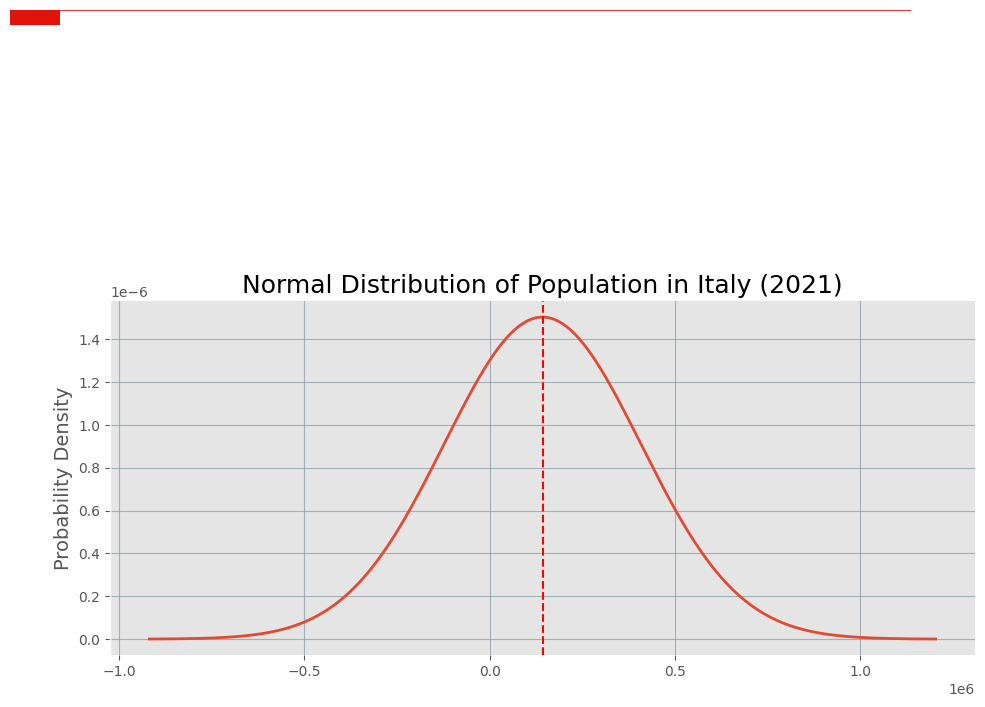

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate mean and standard deviation of the population data
mu = grouped_ita['Population'].mean()
sigma = grouped_ita['Population'].std()

# Generate a normal distribution
dist = stats.norm(mu, sigma)

# Generate x values for plotting
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Calculate y values for plotting
y = dist.pdf(x)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, linewidth=2)

ax.set_title('Normal Distribution of Population in Italy (2021)', fontsize=18)
ax.set_ylabel('Probability Density', fontsize=14)
ax.grid(which="major", axis='both', color='#758D99', alpha=0.6, zorder=1)
ax.axvline(x=mu, linestyle='--', color='r')
ax.spines[['top','right','bottom']].set_visible(False)
ax.annotate(f'Mean={mu:.2f}\nStandard Deviation={sigma:.2f}', xy=(mu, 0.01), xytext=(mu - 1.5*sigma, 0.02),
            arrowprops=dict(facecolor='red', shrink=0.05),
            fontsize=14, color='r')

ax.plot([0.02, 0.92],                   # Set width of line
        [1.17, 1.17],                   # Set height of line
        transform=fig.transFigure,      # Set location relative to plot
        clip_on=False,
        color='#E3120B',
        linewidth=.6)
ax.add_patch(plt.Rectangle((0.02, 1.17),           # Set location of rectangle by lower left corner
                           0.05,                  # Width of rectangle
                           -0.025,                # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B',
                           transform=fig.transFigure,
                           clip_on=False,
                           linewidth=0))
plt.tight_layout()

plt.show()


# Kurtosis and Skewness

In [10]:
print(f"Skewness: {grouped_ita['Population'].skew().round(2)}")
print(f"Kurtosis: {grouped_ita['Population'].kurt().round(2)}")

Skewness: 6.9
Kurtosis: 57.36


In [55]:
grouped_ita['Population'].mean()

142546.08571428573

In [56]:
grouped_ita['Population'].median()

76091.0

Here the **mean is > median** because extreme values affect the mean more than the median. Hence, we might expect the distribution to be skewed to the right

This is not a normal distribution as confirmed by the asymmetry measures above.

##Kurtosis
The curve tends to be **leptokurtic** meaning that data has heavier tails and is more peaked. This suggests the presence of more extreme values (**outliers**).

##Skewness
Also, the bell is slightly **skewed** to the right (>1), meaning that the distribution has a long tail on the right side and most of the data points are concentrated on the left side.

# Spread of Population in Italian cities

In [11]:
# Create a boxplot of Clicks and Impressions columns using Plotly Express
fig = px.violin(grouped_ita,
             y=['Population'],
             orientation='v',
             template='plotly_dark',
             width=1024,
             height=600)

# Add labels and title
fig.update_layout(xaxis_title='Violin plot of Population 2021')

# Display the plot
fig.show()


In [21]:
#@title Calculate IQR
Q1 = ita['Population'].quantile(0.25)
Q3 = ita['Population'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

In [22]:
#@title Use IQR to Identify Outliers
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Segment the data into outliers and non-outliers
outliers_below = ita[ita['Population'] < lower_bound]
outliers_above = ita[ita['Population'] > upper_bound]
outliers = pd.concat([outliers_below, outliers_above])
non_outliers = ita[(ita['Population'] >= lower_bound) & (ita['Population'] <= upper_bound)]

# Print outliers and non-outliers
print("Outliers:")
print(outliers)
print("\nNon-outliers:")
print(non_outliers)

Outliers:
        City  Population          Region
0       Rome     2617175           Lazio
1      Milan     1242123        Lombardy
2     Naples      962003        Campania
3      Turin      872367        Piedmont
4    Palermo      657651          Sicily
5      Genoa      586180         Liguria
6    Bologna      371337  Emilia-Romagna
7   Florence      358079         Tuscany
8       Bari      315933          Apulia
9    Catania      293902          Sicily
10    Verona      252520          Veneto
11    Venice      261362          Veneto
12   Messina      243262          Sicily
13     Padua      206192          Veneto

Non-outliers:
                 City  Population                 Region
14              Prato      185456                Tuscany
15            Trieste      202123  Friuli-Venezia Giulia
16            Brescia      189902               Lombardy
17              Parma      175895         Emilia-Romagna
18            Taranto      200154                 Apulia
..                

Outliers refer to extreme values from a distribution.
Above, we can observe how such extreme values referred to the largest cities in the dataset.

In [20]:
#@title Segment Data into Quartiles
Q2 = ita['Population'].median()

# Segment the data into quartiles
Q1_segment = ita[ita['Population'] <= Q1]
Q2_segment = ita[(ita['Population'] > Q1) & (ita['Population'] <= Q2)]
Q3_segment = ita[(ita['Population'] > Q2) & (ita['Population'] <= Q3)]
Q4_segment = ita[ita['Population'] > Q3]

# Print quartile segments
print("Small City (<= Q1):")
print(Q1_segment)
print("\nAverage City (Q1 < Population <= Q2):")
print(Q2_segment)
print("\nBig City (Q2 < Population <= Q3):")
print(Q3_segment)
print("\nLarge City (> Q3):")
print(Q4_segment)


Small City (<= Q1):
                 City  Population                 Region
91            Pomezia       56372                  Lazio
98              Olbia       53307               Sardinia
101           Legnano       57647               Lombardy
103            Faenza       57748         Emilia-Romagna
106             Anzio       49731                  Lazio
107            Acerra       56465               Campania
110         Cerignola       56653                 Apulia
112        Moncalieri       55875               Piedmont
113             Cuneo       55013               Piedmont
114         Agrigento       58323                 Sicily
115           Foligno       56045                 Umbria
116            Tivoli       52910                  Lazio
117             Trani       55842                 Apulia
118       Manfredonia       56257                 Apulia
119             Siena       52839                Tuscany
120         Bisceglie       54678                 Apulia
121        

# Data Segmentation based on Distribution Spread
Based on the Population distribution, we can divide the dataset into 3 tiers:

* Large
* Medium
* Average
* Small

In [70]:
import pandas as pd

# Assuming ita is your DataFrame and it contains a column named 'Population'

# Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR
Q1 = ita['Population'].quantile(0.25)
Q3 = ita['Population'].quantile(0.75)
Q2 = ita['Population'].median()

# Segment the data into quartiles
Q1_segment = ita[ita['Population'] <= Q1].copy()
Q1_segment['Size'] = 'Small'

Q2_segment = ita[(ita['Population'] > Q1) & (ita['Population'] <= Q2)].copy()
Q2_segment['Size'] = 'Average'

Q3_segment = ita[(ita['Population'] > Q2) & (ita['Population'] <= Q3)].copy()
Q3_segment['Size'] = 'Medium'

Q4_segment = ita[ita['Population'] > Q3].copy()
Q4_segment['Size'] = 'Large'

# Concatenate the segments
all_segments = pd.concat([Q1_segment, Q2_segment, Q3_segment, Q4_segment])
all_segments.sort_values('Population', ascending=False, inplace=True)
all_segments.to_excel('italian_output.xlsx',index=False)
all_segments

,City,Population,Region,Size
0,Rome,2617175,Lazio,Large
1,Milan,1242123,Lombardy,Large
2,Naples,962003,Campania,Large
3,Turin,872367,Piedmont,Large
4,Palermo,657651,Sicily,Large
...,...,...,...,...
123,Montesilvano,50413,Abruzzo,Small
136,Rovigo,50164,Veneto,Small
134,Rho,50052,Lombardy,Small
138,Mazara del Vallo,49995,Sicily,Small


In [67]:
#@title Population Density by Region (2021)
import plotly.express as px

# Create a pivot table
pivot_ita = all_segments.pivot_table(index='Size', columns='Region', values="Population", fill_value=0)

# Sort the columns based on total population
sorted_columns = pivot_ita.sum().sort_values(ascending=False).index
pivot_ita = pivot_ita[sorted_columns]

# Create a heatmap with color scale
heatmap = px.imshow(pivot_ita, text_auto=True)
heatmap.update_layout(
    title='Population Density by Region (Italy, 2021)',
    template='plotly_dark',
    xaxis_title='',
    yaxis_title='Population',
    width=1200,
    height=700,
    xaxis_tickangle=-45,  # Rotate x-axis tick labels by -45 degrees
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)
heatmap.show()

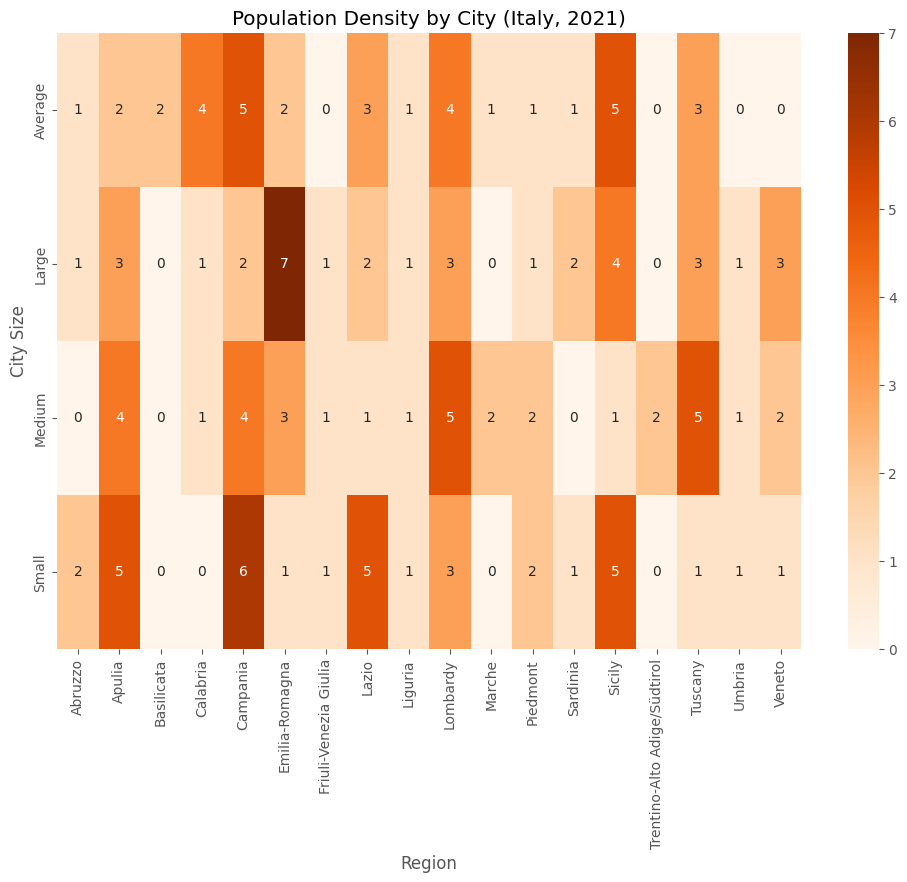

In [68]:
#@title Population Density by City (Italy, 2021)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a crosstab of city sizes and regions
city_size_crosstab = pd.crosstab(all_segments['Size'], all_segments['Region'])

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(city_size_crosstab, annot=True, cmap='Oranges')  # Change color to orange
plt.xlabel('Region')
plt.ylabel('City Size')
plt.title('Population Density by City (Italy, 2021)')
plt.show()
